## 2. 월급 변수 검토 및 전처리하기

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [12]:
welfare = pd.read_csv('./data/Koweps_hpwc14_2019_beta2_step_02.csv')
# chapter10_data_analysis\pandas03\data\Koweps_hpwc14_2019_beta2_step_02.csv
welfare['sex'].head()

0    female
1      male
2      male
3      male
4    female
Name: sex, dtype: object

In [13]:
# 1) 변수 검토하기
# 코드북을 보면 월급은 '일한 달의 평균 임금'을 의미하며 1만원 단위로 기록.
# 변수 이름은 income.
# 성별은 범주 변수이므로 df.value_counts() 를 이용해 범주별 빈도를 확인하면 특징을 파악할 수 잇음.
# 하지만 월급은 연속 변수이므로 df.value_account() 를 이용하면 너무 많은 항목이 출력되어 알아보기 어려움.
# 연속 변수는 df.describe()로 요약 통계량을 확인해야 특징을 파악할 수 잇음.

welfare['income'].dtype

dtype('float64')

In [14]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

C:\Users\fpkm9\.conda\envs\Python_Basic\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


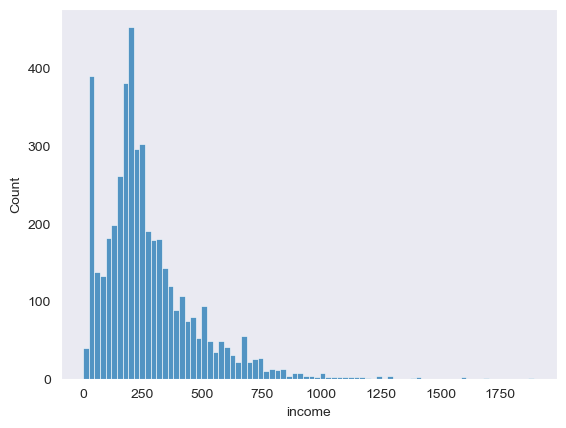

In [15]:
# 출력결과를 보면 float64, 타입이고, 0 ~ 1892 만원의 값을 지님.
# 150 ~ 345 만원에 가장 많이 분포하고 평균은 268만원, 중앙값은 평균보다 작은 220만원이므로
# 전반적으로 낮은 쪽에 치우침. -> 월급이 평균값보다 낮은 사람이 50% 이상

# 히스토그램을 만들어 분포를 확인
sns.histplot(data=welfare,x='income')   # 히스토그램 만들기
plt.grid()
plt.show()

In [16]:
# 2) 전처리 하기
# 코드북을 보면 월급은 만원 단위로 되어 있고, '모름/무응답'은 9999.

welfare['income'].describe()    # 이상치 확인
# max 값을 보니 9999라는 이상치는 없다. 현재.

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [17]:
welfare['income'].isna().sum()  # 결측치 확인 14418

9884

In [18]:
# 출력 결과를 보면 최소값은 0 ~ 1,892 이고 결측치 9,884 개가 있음.
# 즉 9999 가 입력된 데이터는 없음.
# 이상치를 결측 처리하는 절차를 건너 뛰어도 됨.

# 만약 9999인 항목이 있다면 아래와 같이 이상치를 결측 처리하는 절차를 거쳐야 함.
# 이상치 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

In [19]:
# 결측치 확인
print(welfare['income'].isna().sum())

9884
